In [1]:
import Aarambam as Arm
import numpy as np, matplotlib.pyplot as plt

In [2]:
plt.rcParams["axes.linewidth"]  = 1.0
plt.rcParams["xtick.major.size"]  = 3.5
plt.rcParams["xtick.minor.size"]  = 2
plt.rcParams["ytick.major.size"]  = 3.5
plt.rcParams["ytick.minor.size"]  = 2
plt.rcParams["xtick.direction"]  = "in"
plt.rcParams["ytick.direction"]  = "in"
plt.rcParams["legend.frameon"] = 'False'
plt.rcParams['figure.figsize'] = [10, 10]
plt.rc('text', usetex=False)
plt.rc('font', family='serif', size=22)

COLORS = ["f07167","219ebc","c767ac","E0A100","59a270", 'A2A1A5']
COLORS = ['#' + c if c[0] != '#' else c for c in COLORS ]

from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color=COLORS)

# Decompose basis

In [3]:
#Setup the decomposition with some default values
#  N_modes: sets the highest order the modes go to
#  n_s: spectral index. Used to account for mild breaking of scale invariance
#  Lbox: Sim box in Mpc/h
#  Nmax: The maximum wavenumber (in units of kF = 2*pi/Lbox) the decomposition goes up to.
#  ModeTol: Accuracy limit, defined as (residual_err / Inner product). Play around with this.
#  MaxModeCount: The maximum number of modes. Generally good to use between 100 to 150.
Unit  = Arm.utils.Decomposer(N_modes = 15, n_s = 0.96, Lbox = 1000, Nmax = 512, ModeTol = 0.00001, MaxModeCount = 150)

#Pass in the relevant model and decomposer. Pass any args the model requires.
#And finally, if you pass in outdir, then the decomposed coeffs will be written out
#in the format ready for running LPT!
coeff = Unit.go(Arm.models.ScalarI, Arm.basis.BasicBasisDecompose, mass = 1, outdir = "./")

Tetrapyd weights computed
(Finished in 0.295526s)

1D mode functions evaluated
Basis is now ready
(Finished 22.793786s)

Zeroing out mode inds [ 0  1  2  4  6  7  8  9 11 12 13 14 15 16 17 18 19] 



Building targeted Mode basis: 129it [01:33,  1.03it/s, loss=0.00031, norm=1.111771e+03, cond=2.524662e+07]


 USED ALL AVAILABLE MODES


Building targeted Mode basis: 129it [01:34,  1.37it/s, loss=0.00031, norm=1.111771e+03, cond=2.524662e+07]


 USING MODES [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  25  26  27  29  30  31  33  34  44  48  49  50  51  52  54  55
  62  65  69  70  73  76  79  81  83  89  93  98 102 105 106 107 114 120
 124 128 129 132 134 138 140 142 144 156 159 160 163 171 172 174 177 179
 183 185 192 202 206 212 217 219 229 234 240 250 258 267 273 275 278 285
 291 292 295 300 312 317 320 334 353 355 356 358 361 373 374 382 390 395
 405 411 433 437 445 446 452 461 464 490 499 503 512 531 542 546 547 549
 550 551 559 560 561 563 569 580 581 587 591 596 597 599 600 610 632 640
 659 665 667 669 677]

 Shape expanded using CG

-------------- BASIS DECOMPOSITION --------------
correlation : 0.9998467250 (std = 1.75078996e-02, eps = 2.47599091e-02)
-------------------------------------------------

Tables written out to ./


# Plot templates

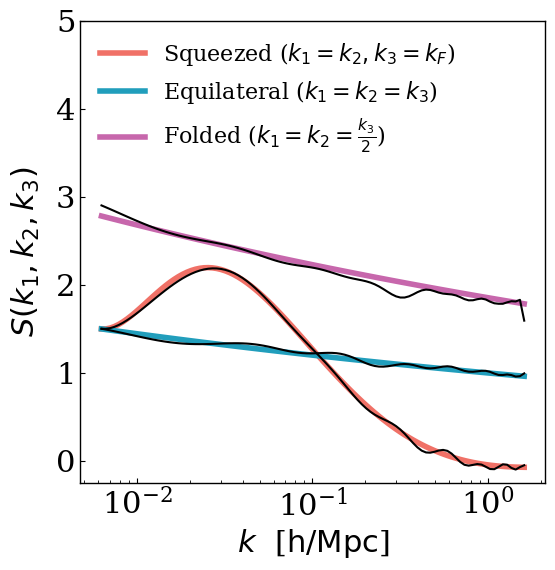

In [4]:
plt.figure(figsize = (6,6))
plt.xscale('log')
Input  = coeff['S_original'].T
Output = coeff['S_apprx'].T
k_in   = coeff['kbin']

for j, label in enumerate(['Squeezed', 'Equilateral', 'Folded']):
    plt.plot(k_in, Input[j], label = j, lw = 4)
    plt.plot(k_in, Output[j], color = 'k', zorder = 10000)
        
plt.legend([plt.plot([], [], lw = 4, color = f'C{i}')[0] for i in range(3)], 
            [r'Squeezed ($k_1 = k_2, k_3 = k_F$)', r'Equilateral ($k_1 = k_2 = k_3$)', r'Folded ($k_1 = k_2 = \frac{k_3}{2}$)'],
            fontsize = 16, ncol = 1, loc = 'upper left')

plt.ylabel(r'$S(k_1,k_2,k_3)$', size = 22, labelpad = 10)
plt.xlabel(r'$k$  [$\rm h/Mpc$]', size = 22)
plt.ylim(None, 5)
plt.show()